# Molecular Bigrams
Tyler Shoemaker (tshoemaker \[at\] ucdavis \[dot\] edu) 

In [1]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [2]:
def unigramNetwork(text):
    G = nx.Graph()
    G.add_node(text)
    
    return G

In [3]:
def bigramNetwork(text, dataframe):
    bigrams = re.findall(r'(?=([a-zA-Z]{2}))', text.lower())
    
    G = nx.DiGraph()
    for pair in bigrams:
        source = pair[0]
        target = pair[1]
        val_query = dataframe[source]
        weight = val_query[target] * 3
        G.add_weighted_edges_from([(source, target, weight)])
    
    return G

In [15]:
def drawNetwork(text, graph):
    edges = graph.edges()
    weights = [graph[u][v]['weight'] for u,v in edges]
    
    plt.subplot(frameon=False)
    plt.title(text, y=-0.1, fontdict={'fontname':'Tahoma', 'fontsize':12})
    
    pos = nx.spring_layout(graph,
                           k=1.5,
                           iterations=100,
                           seed=5)
    nx.draw_networkx_nodes(graph, pos,
                           node_size=250,
                           node_color='#000000')
    nx.draw_networkx_labels(graph, pos,
                            font_family='Tahoma',
                            font_color='#FFFFFF')
    nx.draw_networkx_edges(graph, pos,
                           width=weights,
                           arrowsize=1,
                           arrowstyle='wedge, tail_width=.3, shrink_factor=5',
                           connectionstyle='arc3, rad=.3')
    
    plt.show()

### Enter text here:

In [16]:
text = 'joke'

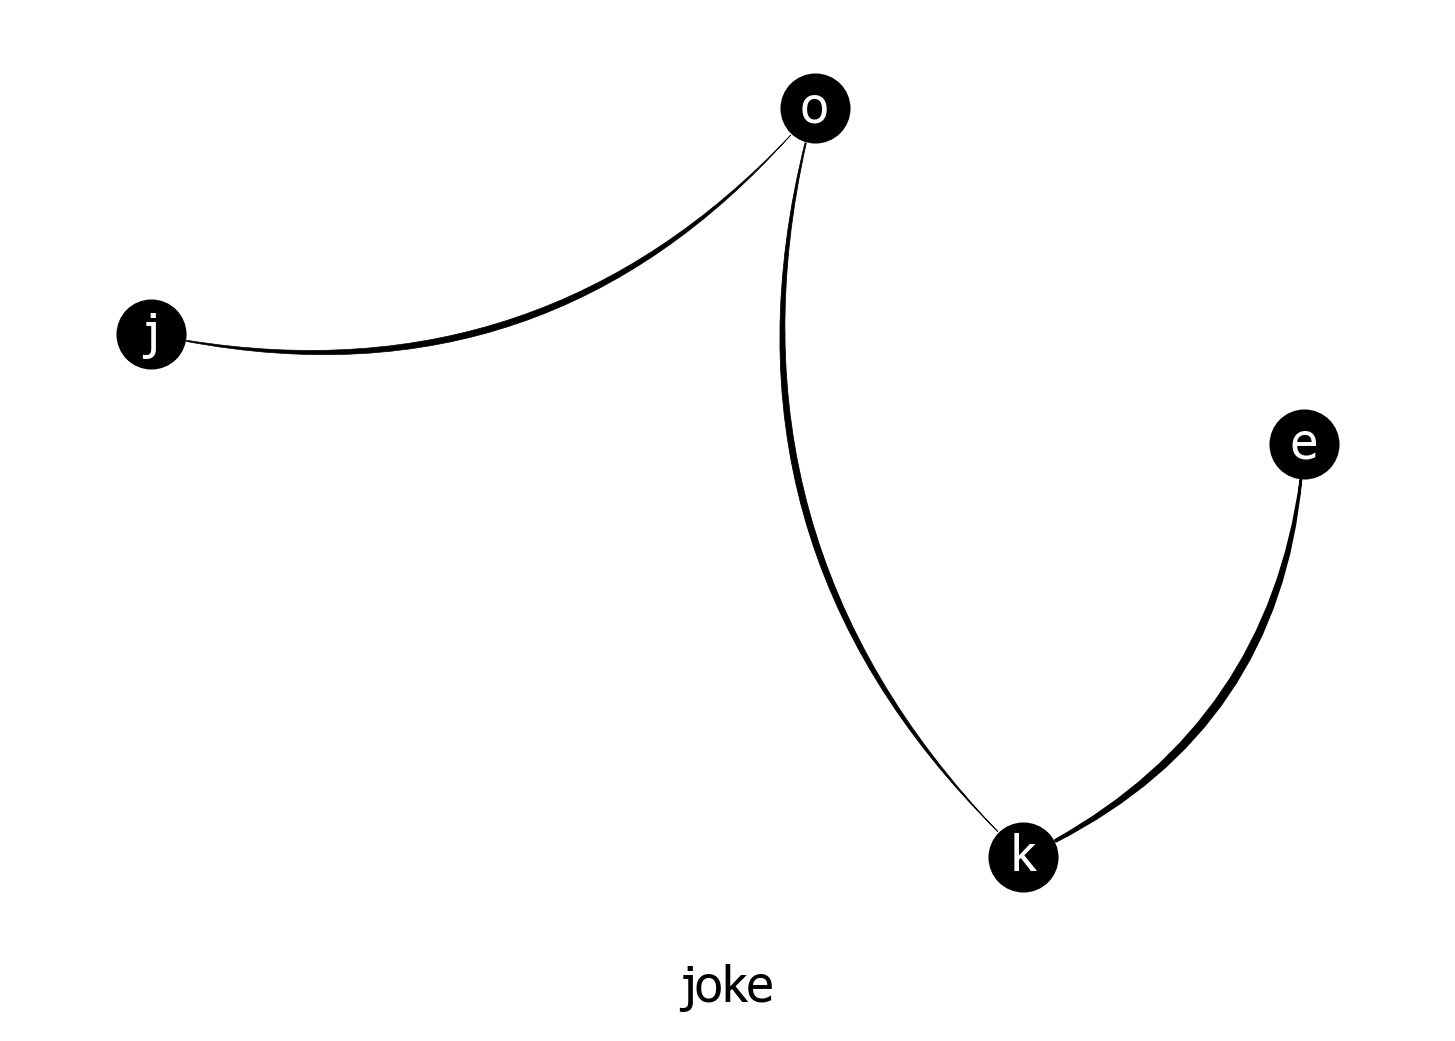

In [17]:
with open('./google-books-bigrams.csv', 'r') as f:
    df = pd.read_csv(f, index_col=0)
    if len(text) == 1:
        graph = unigramNetwork(text)
        drawNetwork(text, graph)
    else:
        graph = bigramNetwork(text, df)
        drawNetwork(text, graph)